R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [1]:
install.packages("tidyverse")       
install.packages("cluster")         
install.packages("reshape2")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(cluster)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
#Get the Iris dataset from the built-in R datasets

irisdata <- iris

In [4]:
summary(irisdata)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [5]:
glimpse(irisdata)

Observations: 150
Variables: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, …


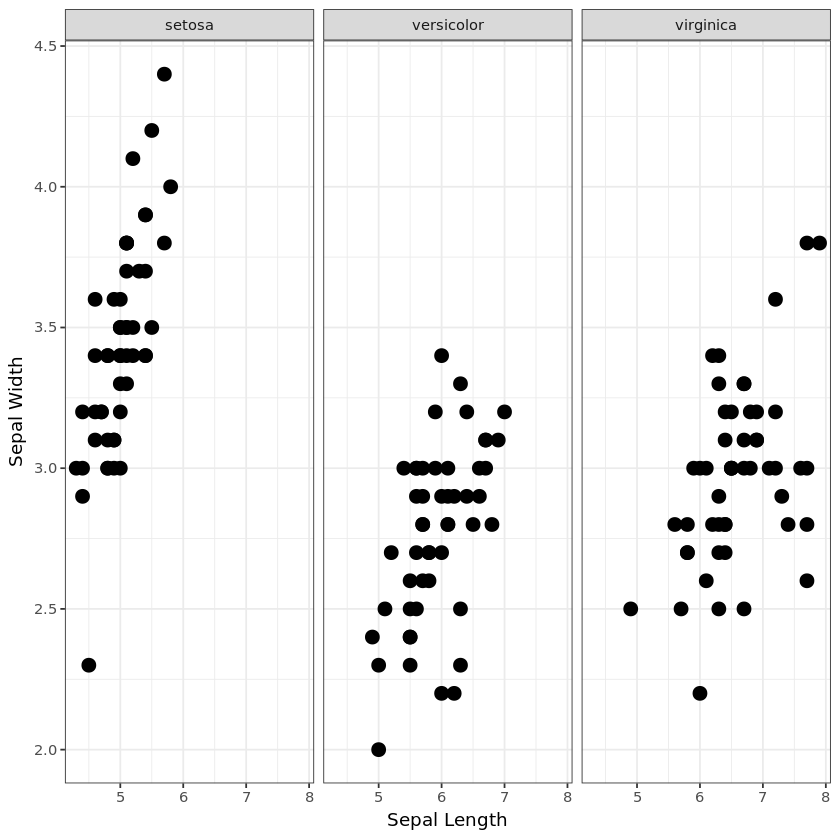

In [6]:
#Create a plot of Sepal-Length vs. Sepal-Width using ggplot function

ggplot(irisdata)+
 geom_point(aes(x = Sepal.Length, y = Sepal.Width), stroke = 2)+
 facet_wrap(~ Species)+ 
 labs(x = 'Sepal Length', y = 'Sepal Width')+
 theme_bw()

#The border size of the points is varied using the stroke command

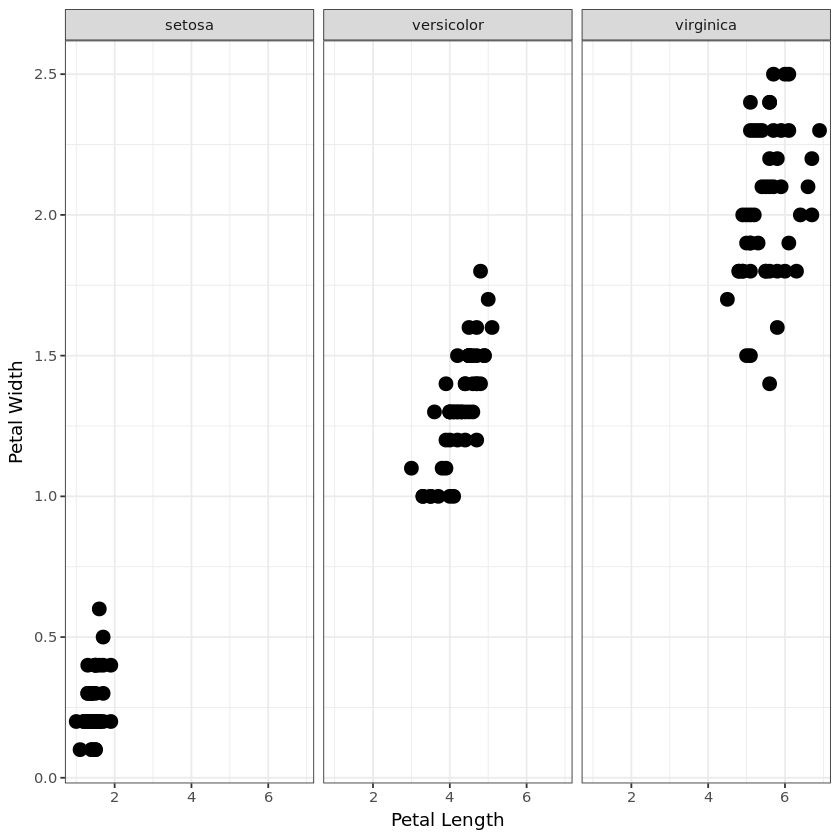

In [7]:
#Create a plot of Petal-Length vs. Petal-Width using ggplot function

ggplot(irisdata)+
 geom_point(aes(x = Petal.Length, y = Petal.Width), stroke = 2)+
 facet_wrap(~ Species)+ 
 labs(x = 'Petal Length', y = 'Petal Width')+
 theme_bw()

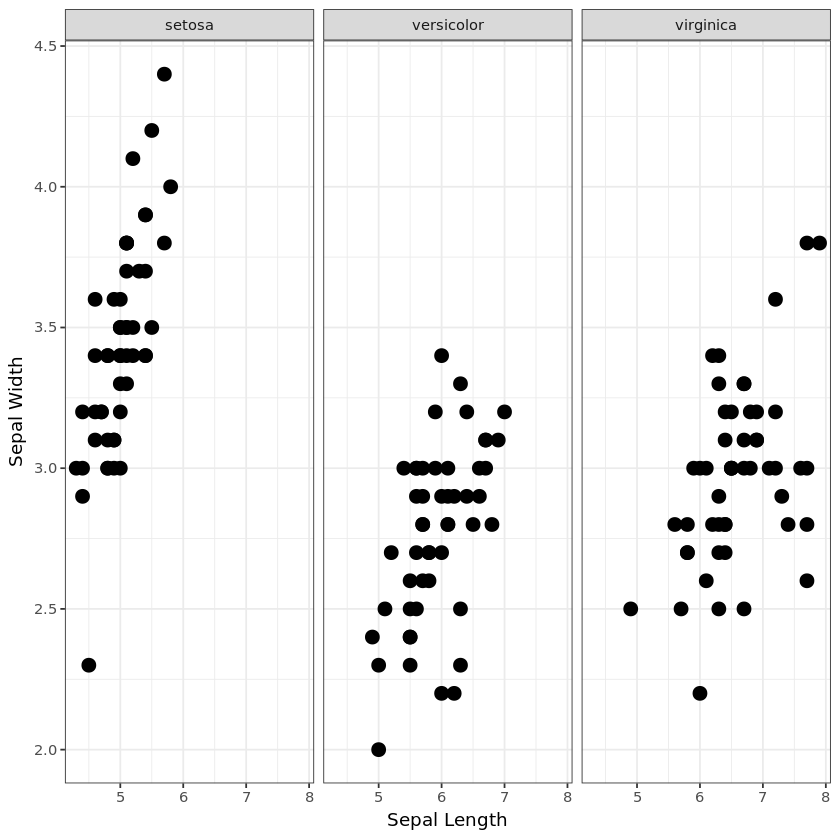

In [8]:
#Create a plot of Sepal-Length vs. Petal-Length using ggplot function

ggplot(irisdata)+
 geom_point(aes(x = Sepal.Length, y = Sepal.Width), stroke = 2)+
 facet_wrap(~ Species)+ 
 labs(x = 'Sepal Length', y = 'Sepal Width')+
 theme_bw()

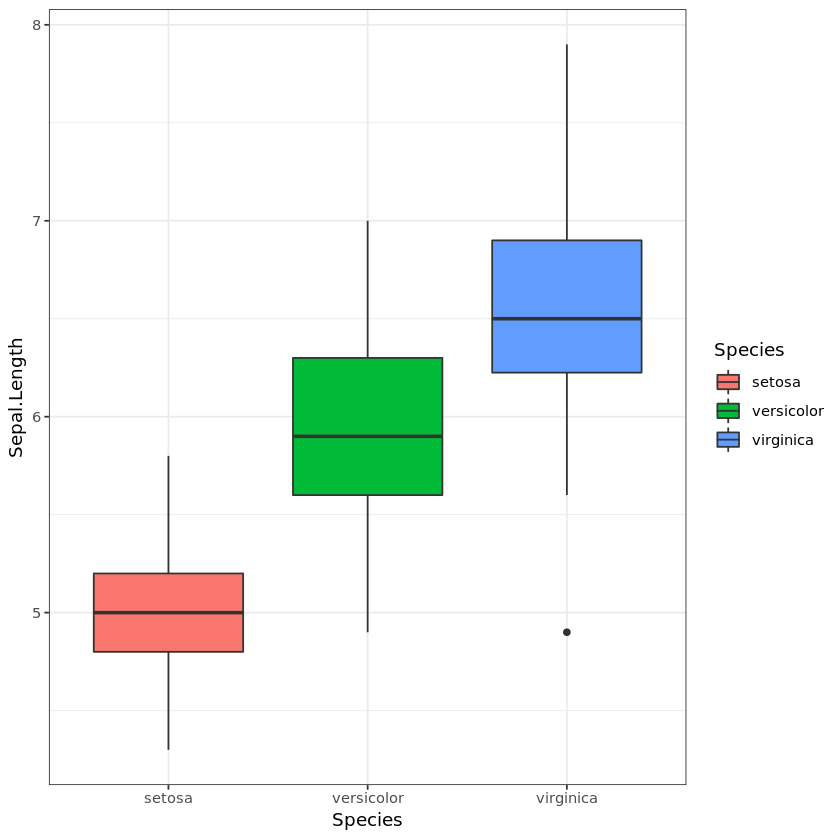

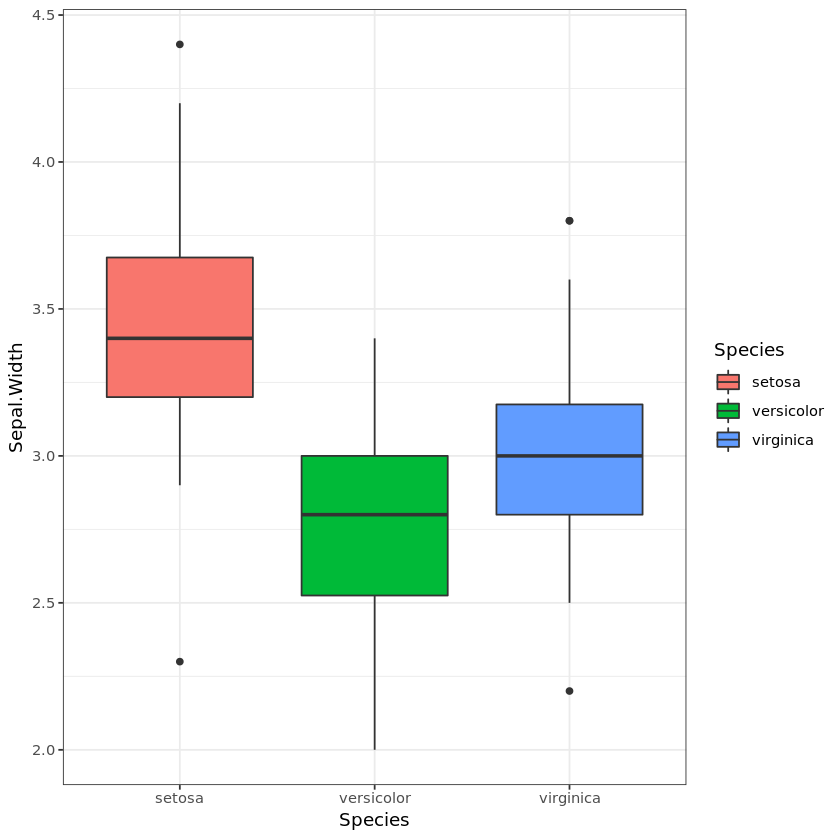

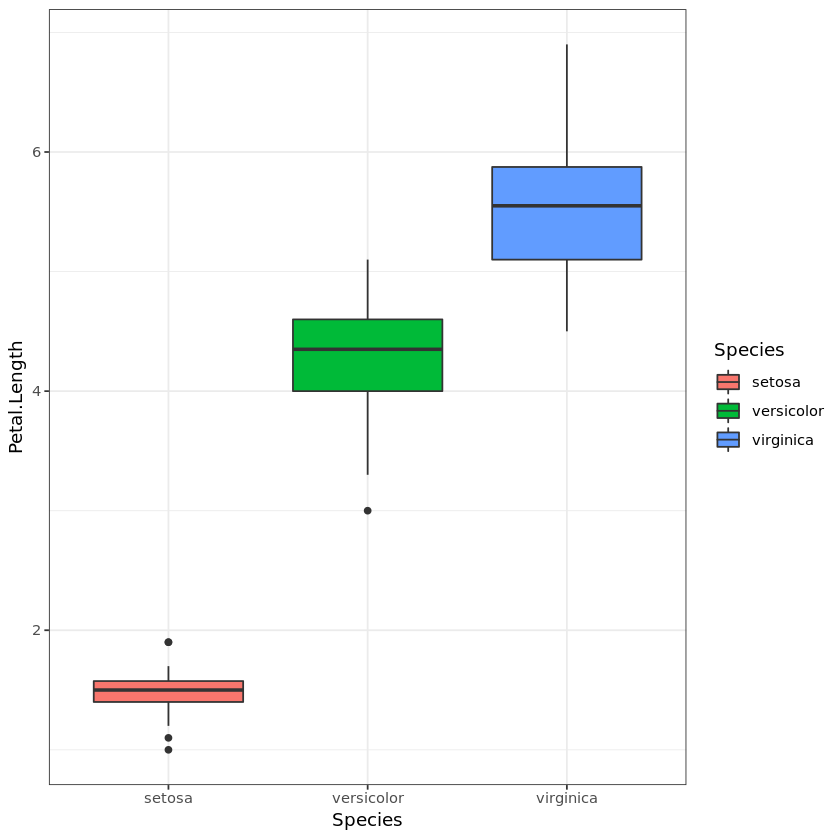

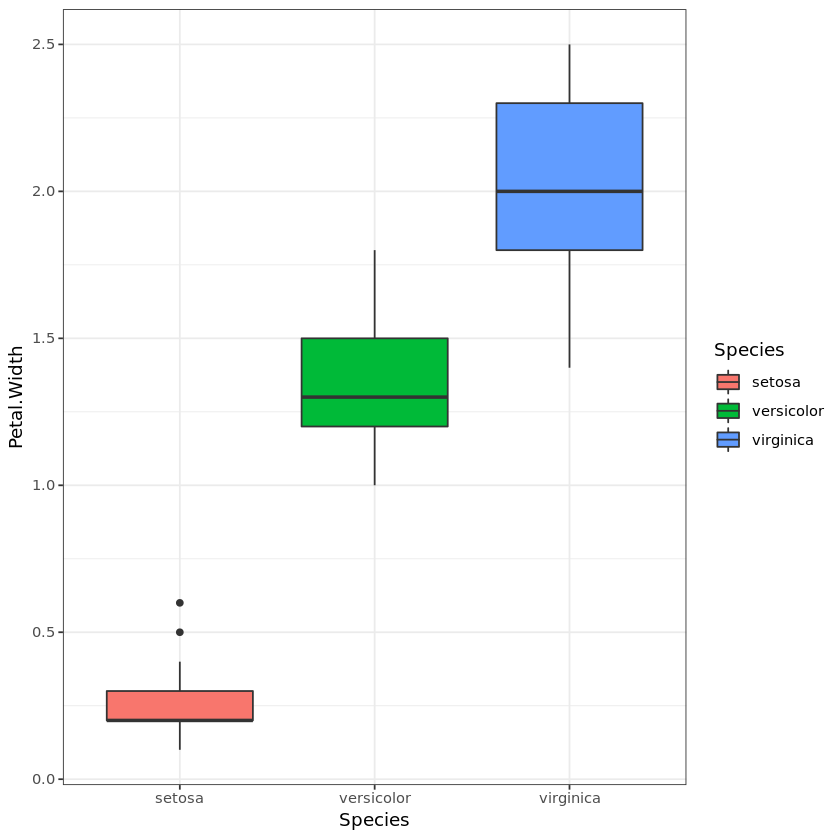

In [9]:
#Boxplots

ggplot(irisdata)+
 geom_boxplot(aes(x = Species, y = Sepal.Length, fill = Species))+
 theme_bw()

ggplot(irisdata)+
 geom_boxplot(aes(x = Species, y = Sepal.Width, fill = Species))+
 theme_bw()

ggplot(irisdata)+
 geom_boxplot(aes(x = Species, y = Petal.Length, fill = Species))+
 theme_bw()

ggplot(irisdata)+
 geom_boxplot(aes(x = Species, y = Petal.Width, fill = Species))+
 theme_bw()

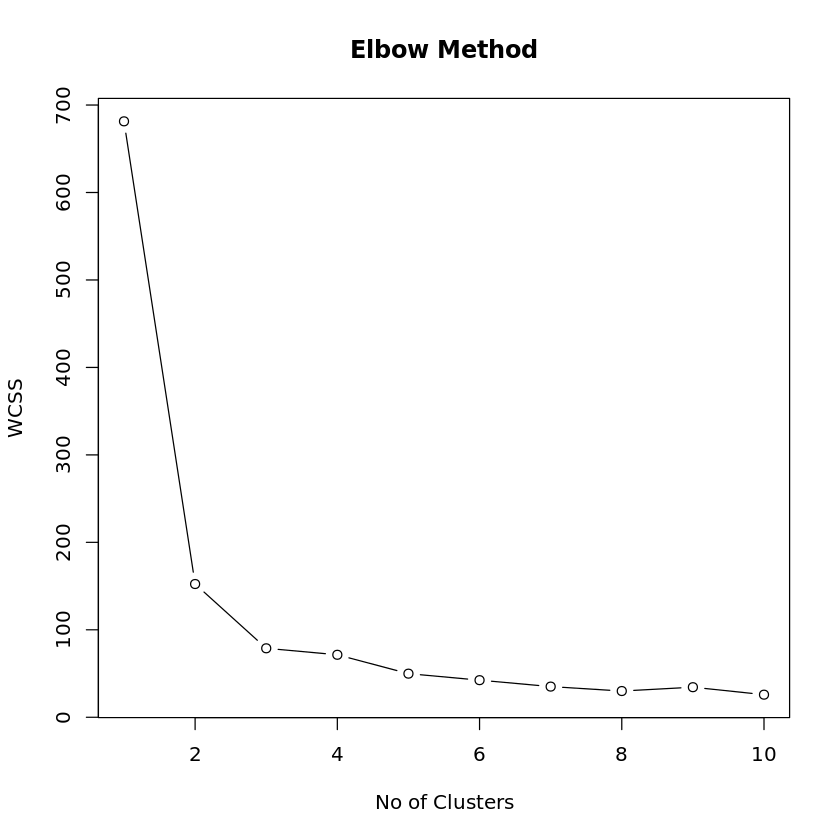

In [10]:
#Use Elbow Method to find the optimum number of clusters
#wcss = within cluster sum of squares. AIm is to minimize wcss so as to maximize distance between clusters

set.seed(145)
wcss <- vector()

for (i in 1:10) wcss[i] <- sum(kmeans(irisdata[, -5], i)$withinss)

plot(1:10,
 wcss,
 type = 'b',
 main = paste('Elbow Method'),
 xlab = 'No of Clusters',
 ylab = 'WCSS'
)

### Elbow point : k = 3

In [11]:
set.seed(145)
km <- kmeans( x = irisdata[, -5] , centers = 3)

yclus <- km$cluster
table(yclus)

yclus
 1  2  3 
50 62 38 

#### As we can see from the output, 3 clusters having 50, 62, and 38 elements has been created.

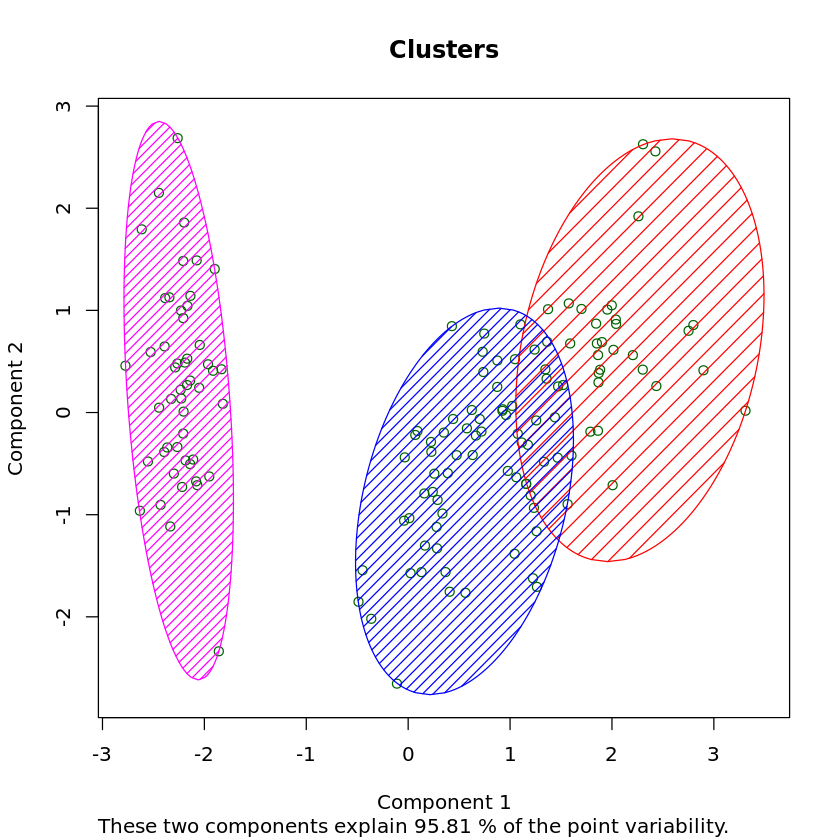

In [12]:
clusplot(irisdata[, -5],
 yclus,
 lines = 0,
 shade = TRUE,
 color = TRUE,
 labels = 0,
 plotchar = FALSE,
 span = TRUE,
 main = paste('Clusters')
)

In [13]:
irisdata$cluster.kmean <- yclus

original <- table(irisdata$Species, irisdata$cluster.kmean)
original

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

### 89% of the cluster output matched with the actual species cluster

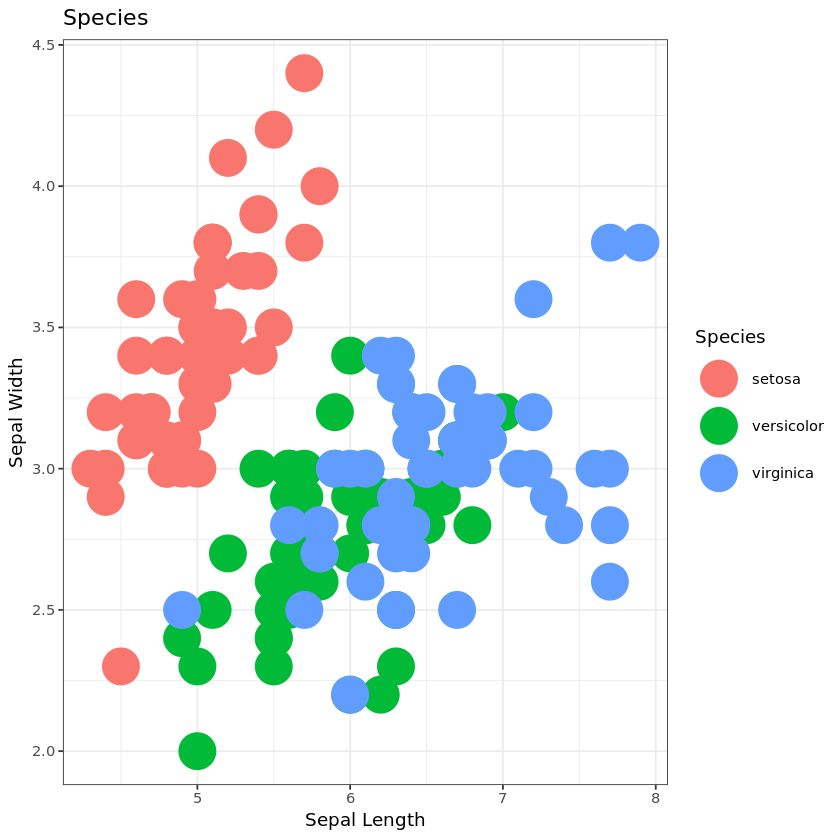

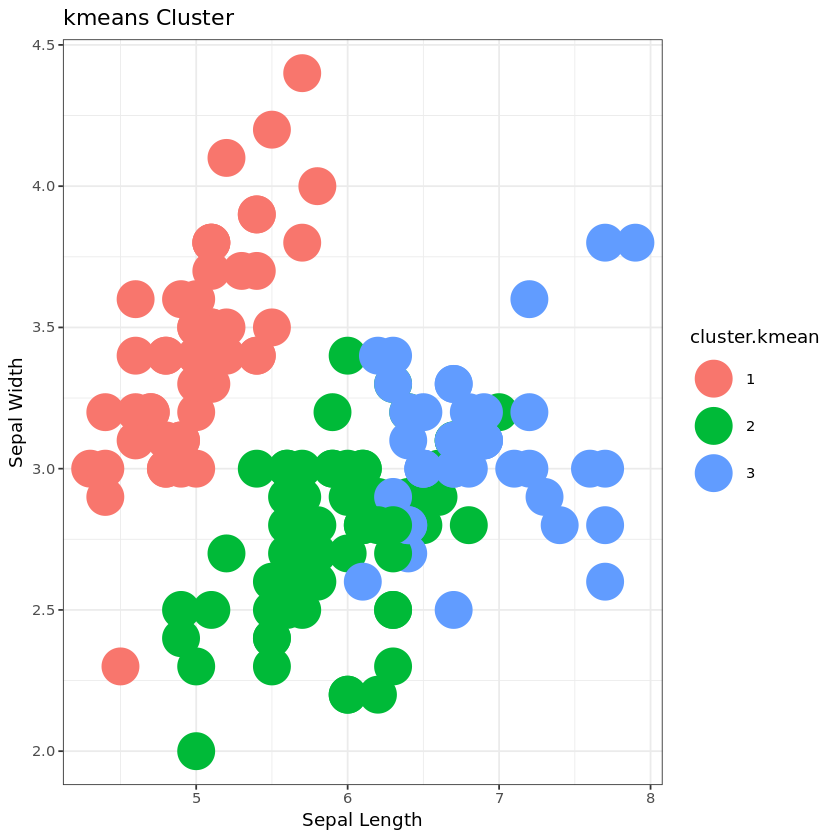

In [14]:
irisdata$cluster.kmean <- as.factor(irisdata$cluster.kmean)

# Sepal-Length vs. Sepal-Width (Species)
ggplot(irisdata)+
  geom_point(aes(x = Sepal.Length, y = Sepal.Width, 
                 color = Species) , size = 10)+ 
  labs(x = 'Sepal Length', y = 'Sepal Width')+
  ggtitle("Species")+
  theme_bw()

# Sepal-Length vs. Sepal-Width (kmeans cluster)
ggplot(irisdata)+
  geom_point(aes(x = Sepal.Length, y = Sepal.Width, 
                 color = cluster.kmean) , size = 10)+ 
  labs(x = 'Sepal Length', y = 'Sepal Width')+
  ggtitle("kmeans Cluster")+
  theme_bw()

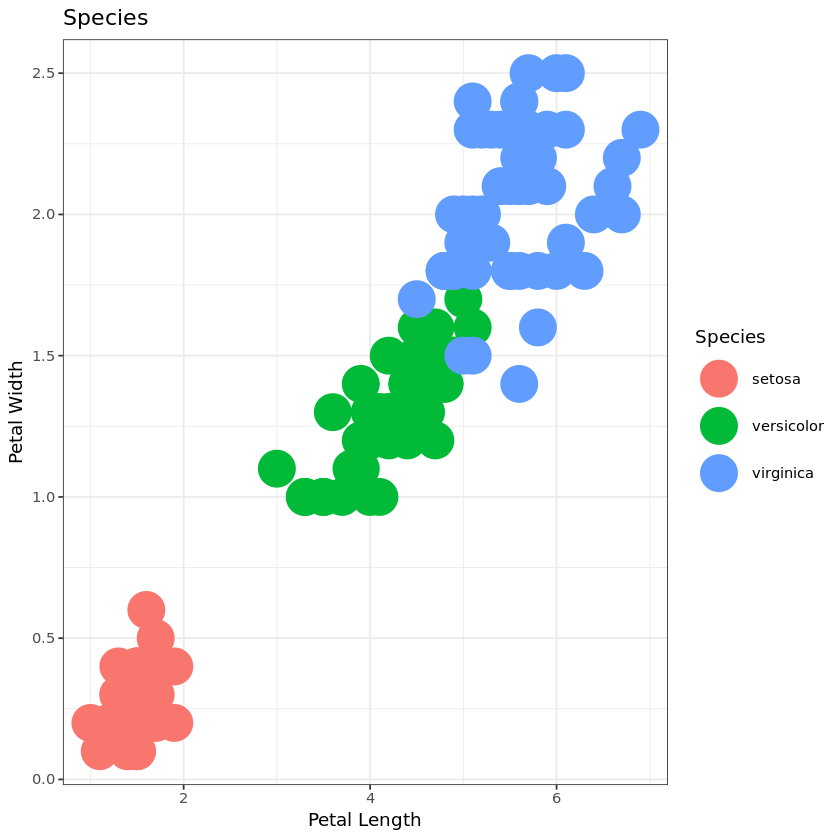

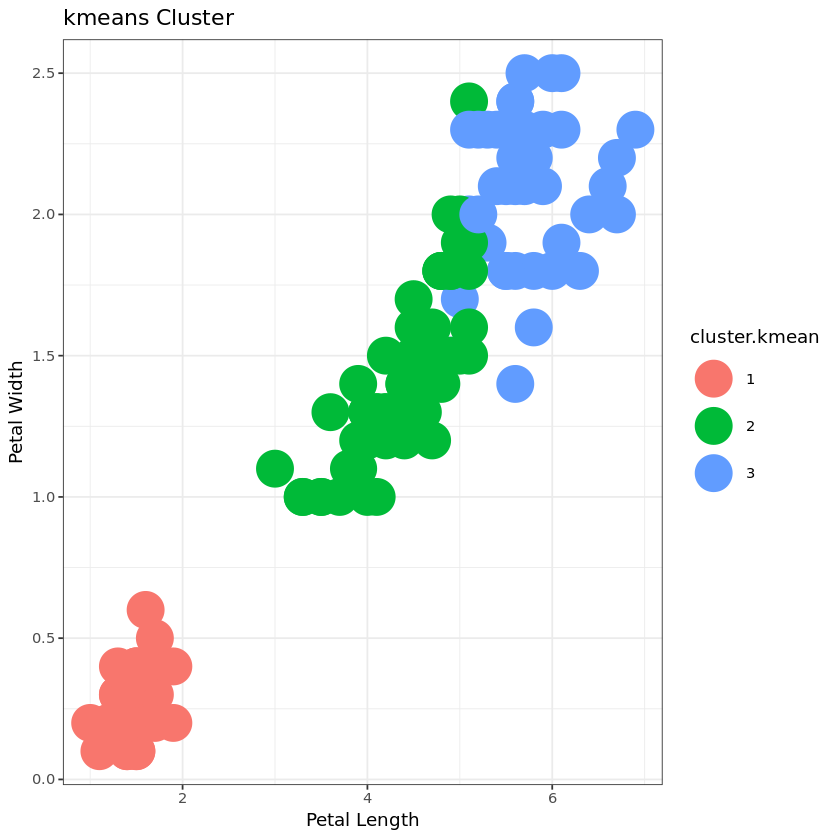

In [15]:
# Petal-Length vs. Petal-Width (Species)
ggplot(irisdata)+
  geom_point(aes(x = Petal.Length, y = Petal.Width, 
                 color = Species) , size = 10)+ 
  labs(x = 'Petal Length', y = 'Petal Width')+
  ggtitle("Species")+
  theme_bw()

# Petal-Length vs. Petal-Width (kmeans cluster)
ggplot(irisdata)+
  geom_point(aes(x = Petal.Length, y = Petal.Width, 
                 color = cluster.kmean) , size = 10)+ 
  labs(x = 'Petal Length', y = 'Petal Width')+
  ggtitle("kmeans Cluster")+
  theme_bw()